Name:Meghashyam Shenoy
Batch:B4
Section:IV Sem B section
Reg no:220968352

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Decision_Tree_1.csv")

Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CGPA                 10 non-null     object
 1   INTERACTIVE          10 non-null     object
 2   PRACTICAL KNOWLEDGE  10 non-null     object
 3   SKILLS               10 non-null     object
 4   JOB OFFEER           10 non-null     object
dtypes: object(5)
memory usage: 532.0+ bytes


In [4]:
df

,CGPA,INTERACTIVE,PRACTICAL KNOWLEDGE,SKILLS,JOB OFFEER
0,>=9,Yes,Very good,Good,Yes
1,>=8,No,Good,Moderate,Yes
2,>=9,No,Average,Poor,No
3,<8,No,Average,Good,No
4,>=8,Yes,Good,Moderate,Yes
5,>=9,Yes,Good,Moderate,Yes
6,<8,Yes,Good,Poor,No
7,>=9,No,Very good,Good,Yes
8,>=8,Yes,Good,Good,Yes
9,>=8,Yes,Average,Good,Yes


In [5]:
df.isnull().sum()

CGPA                   0
INTERACTIVE            0
PRACTICAL KNOWLEDGE    0
SKILLS                 0
JOB OFFEER             0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()

In [7]:
df['CGPA']=a.fit_transform(df['CGPA'])
df['INTERACTIVE']=a.fit_transform(df['INTERACTIVE'])
df['PRACTICAL KNOWLEDGE']=a.fit_transform(df['PRACTICAL KNOWLEDGE'])

df['SKILLS']=a.fit_transform(df['SKILLS'])
df['JOB OFFEER']=a.fit_transform(df['JOB OFFEER'])

In [8]:
df

,CGPA,INTERACTIVE,PRACTICAL KNOWLEDGE,SKILLS,JOB OFFEER
0,2,1,2,0,1
1,1,0,1,1,1
2,2,0,0,2,0
3,0,0,0,0,0
4,1,1,1,1,1
5,2,1,1,1,1
6,0,1,1,2,0
7,2,0,2,0,1
8,1,1,1,0,1
9,1,1,0,0,1


In [9]:
df.describe()

,CGPA,INTERACTIVE,PRACTICAL KNOWLEDGE,SKILLS,JOB OFFEER
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.200000,0.600000,0.900000,0.700000,0.700000
std,0.788811,0.516398,0.737865,0.823273,0.483046
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.250000,0.000000,0.250000
50%,1.000000,1.000000,1.000000,0.500000,1.000000
75%,2.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,1.000000,2.000000,2.000000,1.000000


In [10]:
df.corr()

,CGPA,INTERACTIVE,PRACTICAL KNOWLEDGE,SKILLS,JOB OFFEER
CGPA,1.000000,-0.054554,0.419982,-0.068439,0.466569
INTERACTIVE,-0.054554,1.000000,0.174964,-0.052271,0.356348
PRACTICAL KNOWLEDGE,0.419982,0.174964,1.000000,-0.237783,0.529958
SKILLS,-0.068439,-0.052271,-0.237783,1.000000,-0.530859
JOB OFFEER,0.466569,0.356348,0.529958,-0.530859,1.000000


# Using decision tree

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



In [12]:
X=df.drop('JOB OFFEER',axis=1,inplace=False)
y=df['JOB OFFEER']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)



In [14]:
c=DecisionTreeClassifier()

In [15]:
c.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred=c.predict(X_test)

In [17]:
from sklearn.metrics import f1_score,accuracy_score,classification_report

In [18]:
print(f1_score(y_test,y_pred))

1.0


In [19]:
print(accuracy_score(y_test,y_pred))

1.0


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [30]:
from sklearn import tree
with open("dt1.txt","w") as f:
    f=tree.export_graphviz(c,out_file=f)


In [22]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix

In [23]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[3]], dtype=int64)

<Axes: >

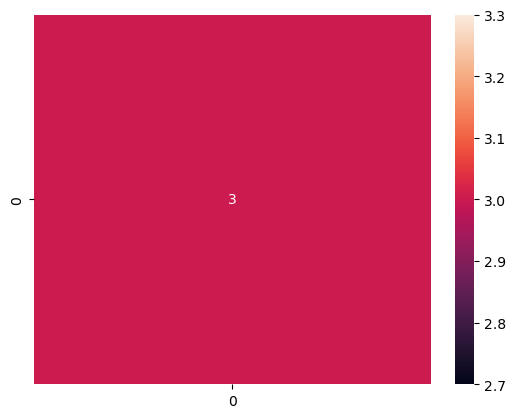

In [24]:
sns.heatmap(cm,annot=True)

In [25]:
from sklearn.metrics import roc_curve,auc 

In [26]:
y_p=c.predict_proba(X_test)[:,1]
y_p

array([1., 1., 1.])

C:\Users\Asus\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


Text(0.5, 1.0, 'ROC curve')

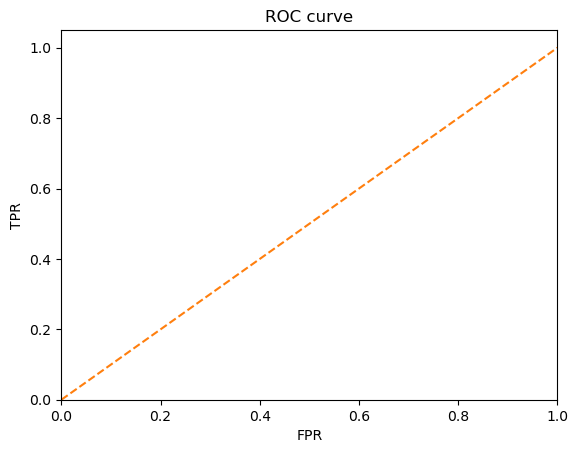

In [27]:
from sklearn.metrics import roc_curve,auc
tpr,fpr,_=roc_curve(y_test,y_p)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")

In [28]:
a=auc(fpr,tpr)
print(a)

nan


In [29]:
from sklearn import tree
with open("DT3.txt","w") as f:
    f=tree.export_graphviz(c,out_file=f)


No Auc score as there is no false values(belonging to class false) in y_test

# Using Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [35]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[3]], dtype=int64)

<Axes: >

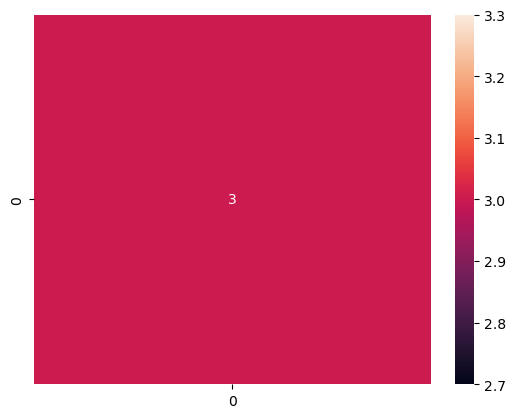

In [36]:
sns.heatmap(cm,annot=True)

In [37]:
y_p=rf_classifier.predict_proba(X_test)[:,1]
y_p

array([0.92, 0.66, 0.91])

C:\Users\Asus\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


Text(0.5, 1.0, 'ROC curve')

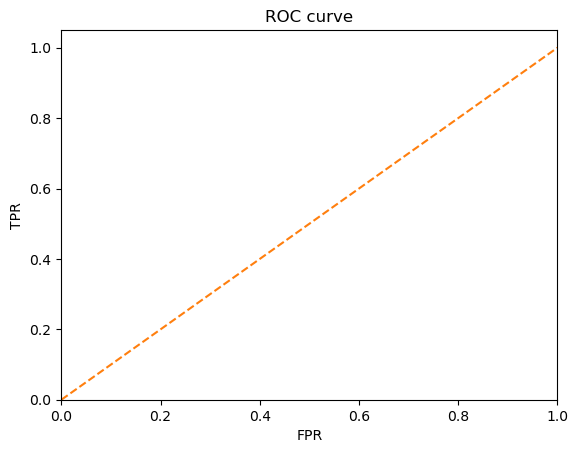

In [38]:
tpr,fpr,_=roc_curve(y_test,y_p)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1.05)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")

In [39]:
print(auc(fpr,tpr))

nan


No Auc score as there is no false values(belonging to class false) in y_test